In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Load data
df = pd.read_excel("crime_data_cleaned_with_time.xlsx")


In [14]:
# Convert crime-related columns to numeric
crime_columns = [
    'rape', 'kidnapping_and_abduction', 'dowry_deaths',
    'assault_on_women_with_intent_to_outrage_her_modesty',
    'insult_to_modesty_of_women', 'cruelty_by_husband_or_his_relatives',
    'importation_of_girls'
]
df[crime_columns] = df[crime_columns].apply(pd.to_numeric, errors='coerce').fillna(0)

# Create 'Crime_Type' column based on the highest value among categories
df['Crime_Type'] = df[crime_columns].idxmax(axis=1)


In [16]:
# Encode 'state/ut' and 'district' columns
le_state = LabelEncoder()
df['state_encoded'] = le_state.fit_transform(df['state/ut'])

le_district = LabelEncoder()
df['district_encoded'] = le_district.fit_transform(df['district'])

# Encode target label
le_target = LabelEncoder()
df['crime_type_encoded'] = le_target.fit_transform(df['Crime_Type'])


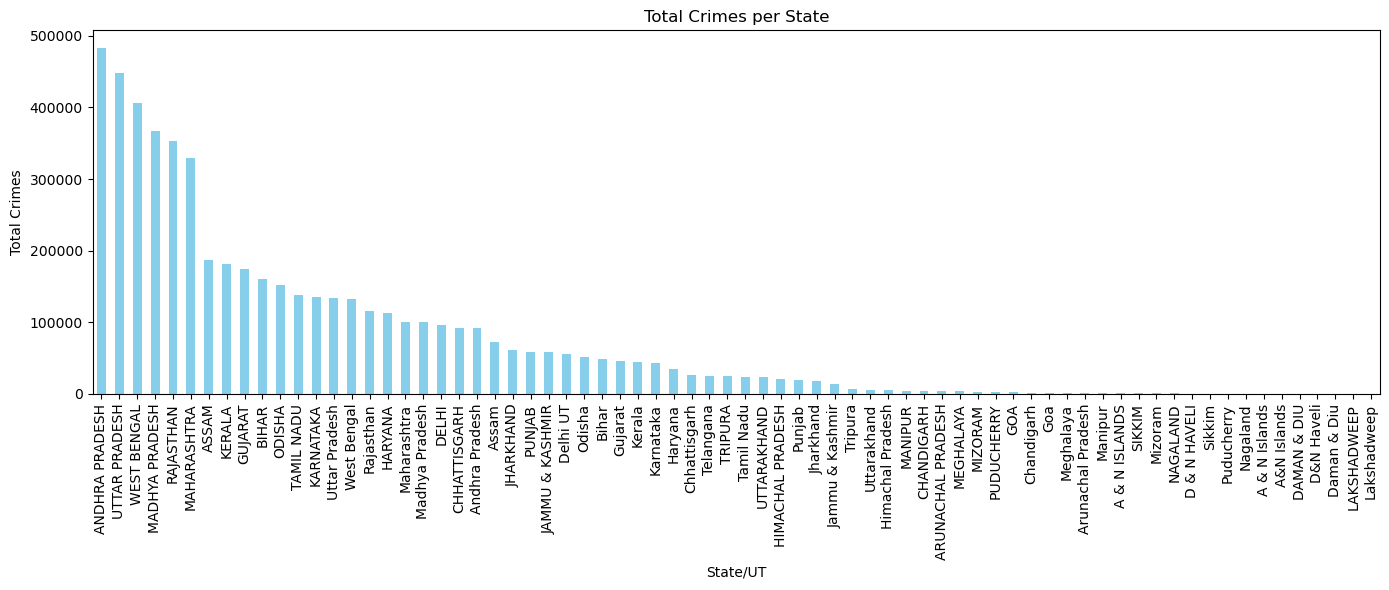

In [18]:
# Create total crimes column
df['total_crimes'] = df[crime_columns].sum(axis=1)

# Plot total crimes per state
plt.figure(figsize=(14, 6))
df.groupby("state/ut")['total_crimes'].sum().sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title("Total Crimes per State")
plt.xlabel("State/UT")
plt.ylabel("Total Crimes")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


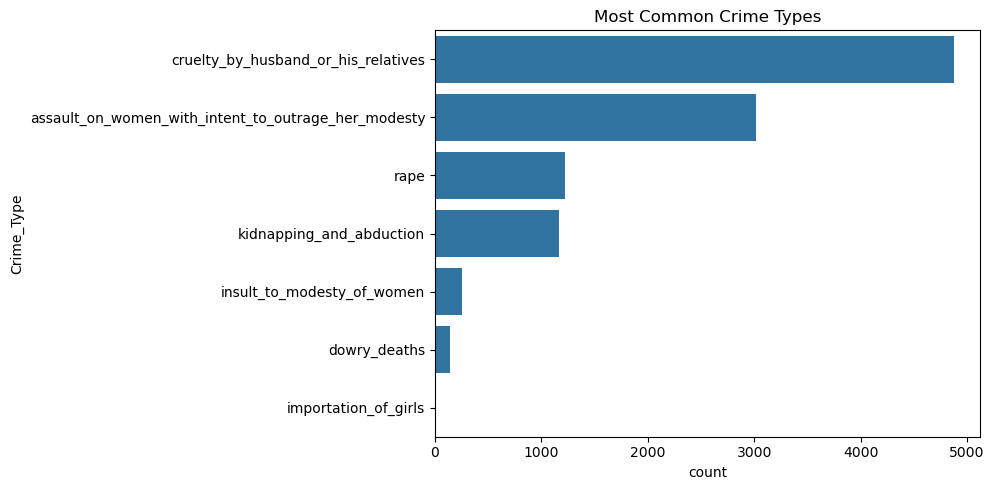

In [20]:
plt.figure(figsize=(10, 5))
sns.countplot(y='Crime_Type', data=df, order=df['Crime_Type'].value_counts().index)
plt.title("Most Common Crime Types")
plt.tight_layout()
plt.show()


In [22]:
# Features and label
X = df[['state_encoded', 'district_encoded', 'year', 'month', 'day', 'hour']]
y = df['crime_type_encoded']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("Model training completed.")


Model training completed.


✅ Model Accuracy: 65.59%

📊 Classification Report:
                                                     precision    recall  f1-score   support

assault_on_women_with_intent_to_outrage_her_modesty       0.67      0.65      0.66       619
                cruelty_by_husband_or_his_relatives       0.67      0.87      0.76       963
                                       dowry_deaths       0.00      0.00      0.00        32
                               importation_of_girls       0.00      0.00      0.00         1
                         insult_to_modesty_of_women       0.33      0.02      0.03        60
                           kidnapping_and_abduction       0.51      0.28      0.36       220
                                               rape       0.61      0.44      0.51       241

                                           accuracy                           0.66      2136
                                          macro avg       0.40      0.32      0.33      2136
                 

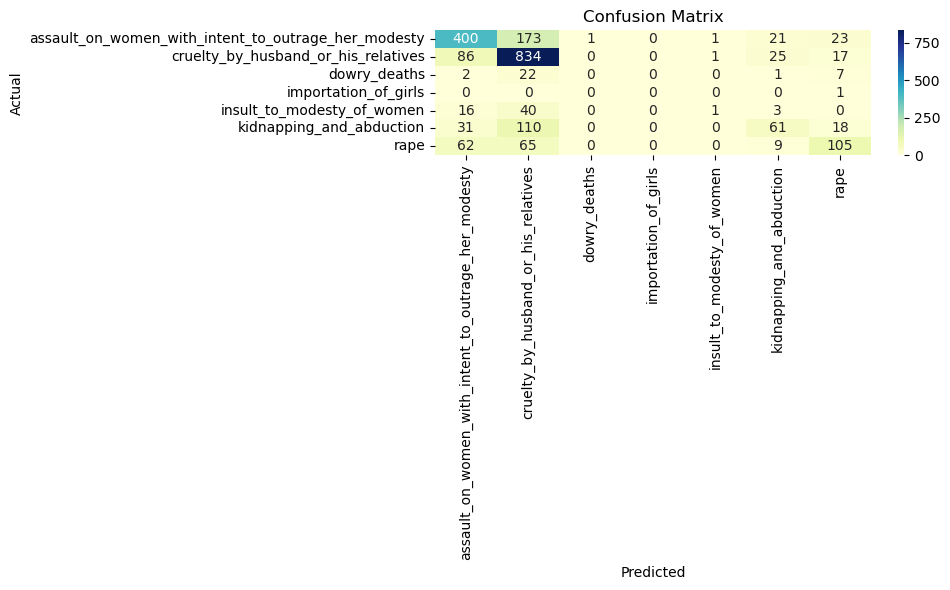

In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on test data
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {accuracy * 100:.2f}%")

# Classification report with zero_division fix
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=le_target.classes_, zero_division=0))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d',
            xticklabels=le_target.classes_,
            yticklabels=le_target.classes_,
            cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


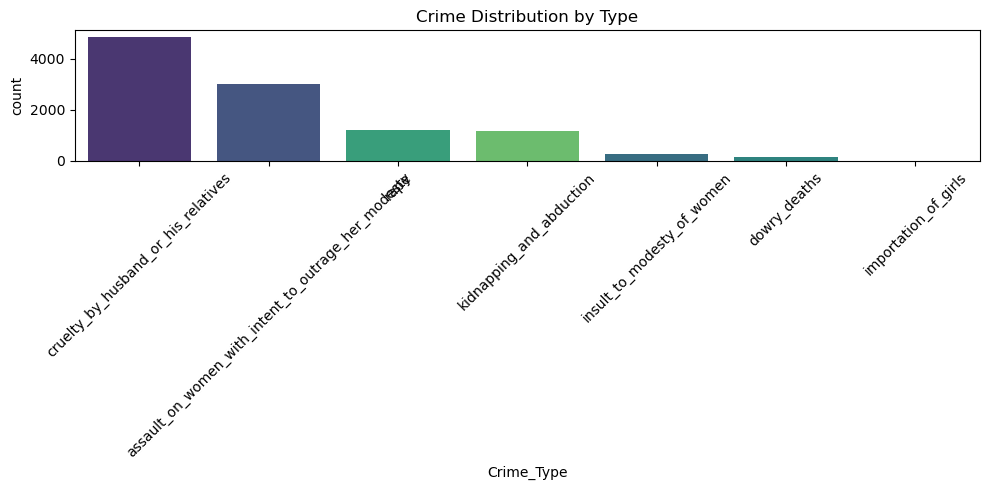

In [30]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Crime_Type', order=df['Crime_Type'].value_counts().index, hue='Crime_Type', palette='viridis', legend=False)
plt.title('Crime Distribution by Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


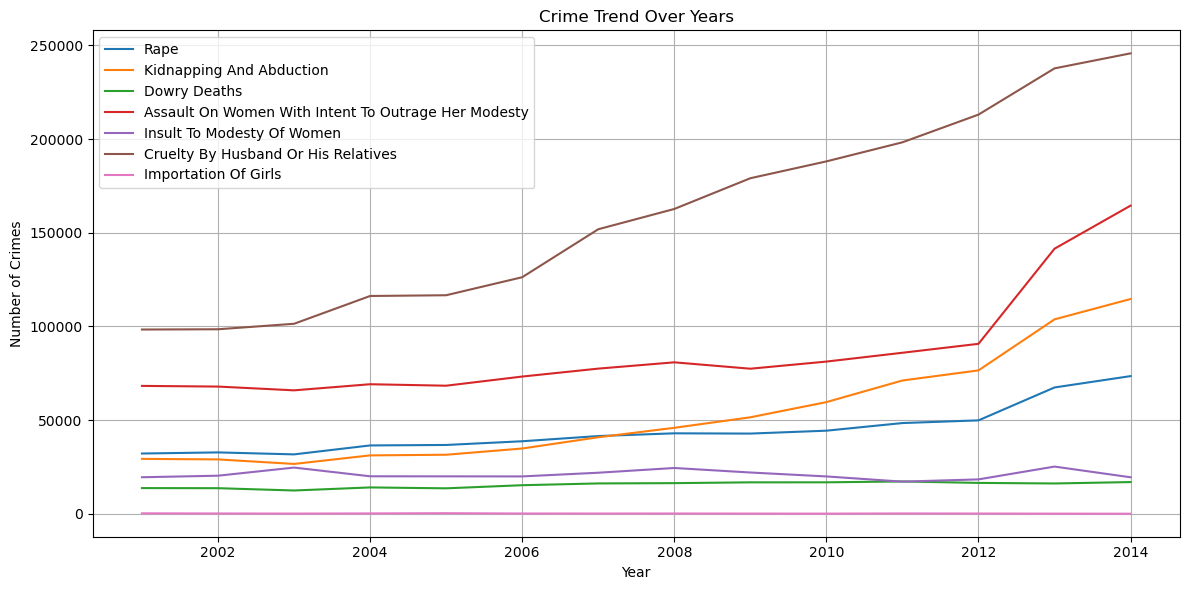

In [32]:
yearly_crime = df.groupby('year')[crime_columns].sum()

plt.figure(figsize=(12, 6))
for col in crime_columns:
    plt.plot(yearly_crime.index, yearly_crime[col], label=col.replace('_', ' ').title())

plt.title("Crime Trend Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


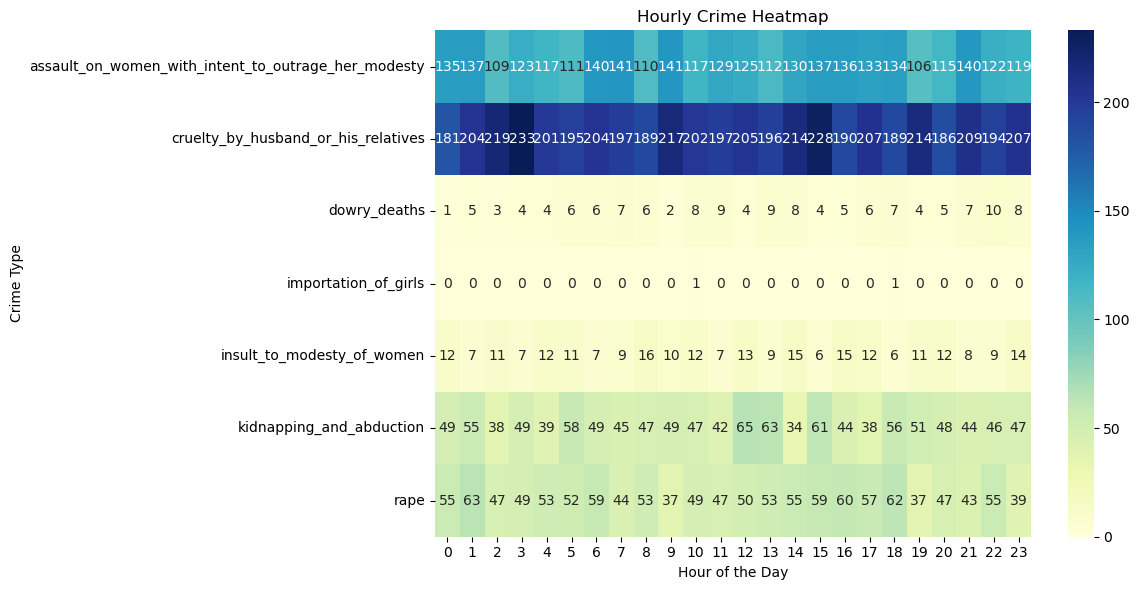

In [38]:
hourly_data = df.groupby(['hour', 'Crime_Type']).size().unstack().fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(hourly_data.T, cmap="YlGnBu", annot=True, fmt='.0f')
plt.title("Hourly Crime Heatmap")
plt.xlabel("Hour of the Day")
plt.ylabel("Crime Type")
plt.tight_layout()
plt.show()
